In [1]:
import pandas as pd

In [2]:
df_cpi = pd.read_csv("ConsumerPriceIndexforallUrbanConsumers.csv")
df_cpi.dropna()
df_cpi.reset_index(drop = True, inplace = True)
df_cpi.rename(columns={'CUSR0000SEEE01': 'ConsumerPriceIndex'}, inplace=True) 
df_cpi

,observation_date,ConsumerPriceIndex
0,2010-01-01,78.180
1,2010-02-01,77.450
2,2010-03-01,77.649
3,2010-04-01,77.154
4,2010-05-01,76.192
...,...,...
183,2025-04-01,34.805
184,2025-05-01,35.202
185,2025-06-01,35.685
186,2025-07-01,35.273


In [3]:
def filterDate_cpi(year):
    data = []
    for i in range(len(df_cpi)):
        n = year
        num = str(n)
        if num in df_cpi["observation_date"][i]:
            a = df_cpi["observation_date"][i]
            b = df_cpi["ConsumerPriceIndex"][i]
            d = {"observation_date" : a, "ConsumerPriceIndex" : b}
            data.append(d)

    df = pd.DataFrame(data)   
    return df 

In [4]:
df_cpi_2010 = filterDate_cpi(2010)
df_cpi_2010

,observation_date,ConsumerPriceIndex
0,2010-01-01,78.180
1,2010-02-01,77.450
2,2010-03-01,77.649
3,2010-04-01,77.154
4,2010-05-01,76.192
5,2010-06-01,75.584
6,2010-07-01,75.907
7,2010-08-01,76.305
8,2010-09-01,76.460
9,2010-10-01,75.880


In [5]:
df_cpi_FirstHalf = df_cpi_2010
num = 2011
for i in range(7):
    df2 = filterDate_cpi(num)
    df_cpi_FirstHalf = pd.merge(df_cpi_FirstHalf, df2, how = "outer")
    num += 1

In [6]:
df_cpi_SecondHalf = filterDate_cpi(2018)
num = 2019
for i in range(7):
    df2 = filterDate_cpi(num)
    df_cpi_SecondHalf = pd.merge(df_cpi_SecondHalf, df2, how = "outer")
    num += 1

<Axes: xlabel='observation_date'>

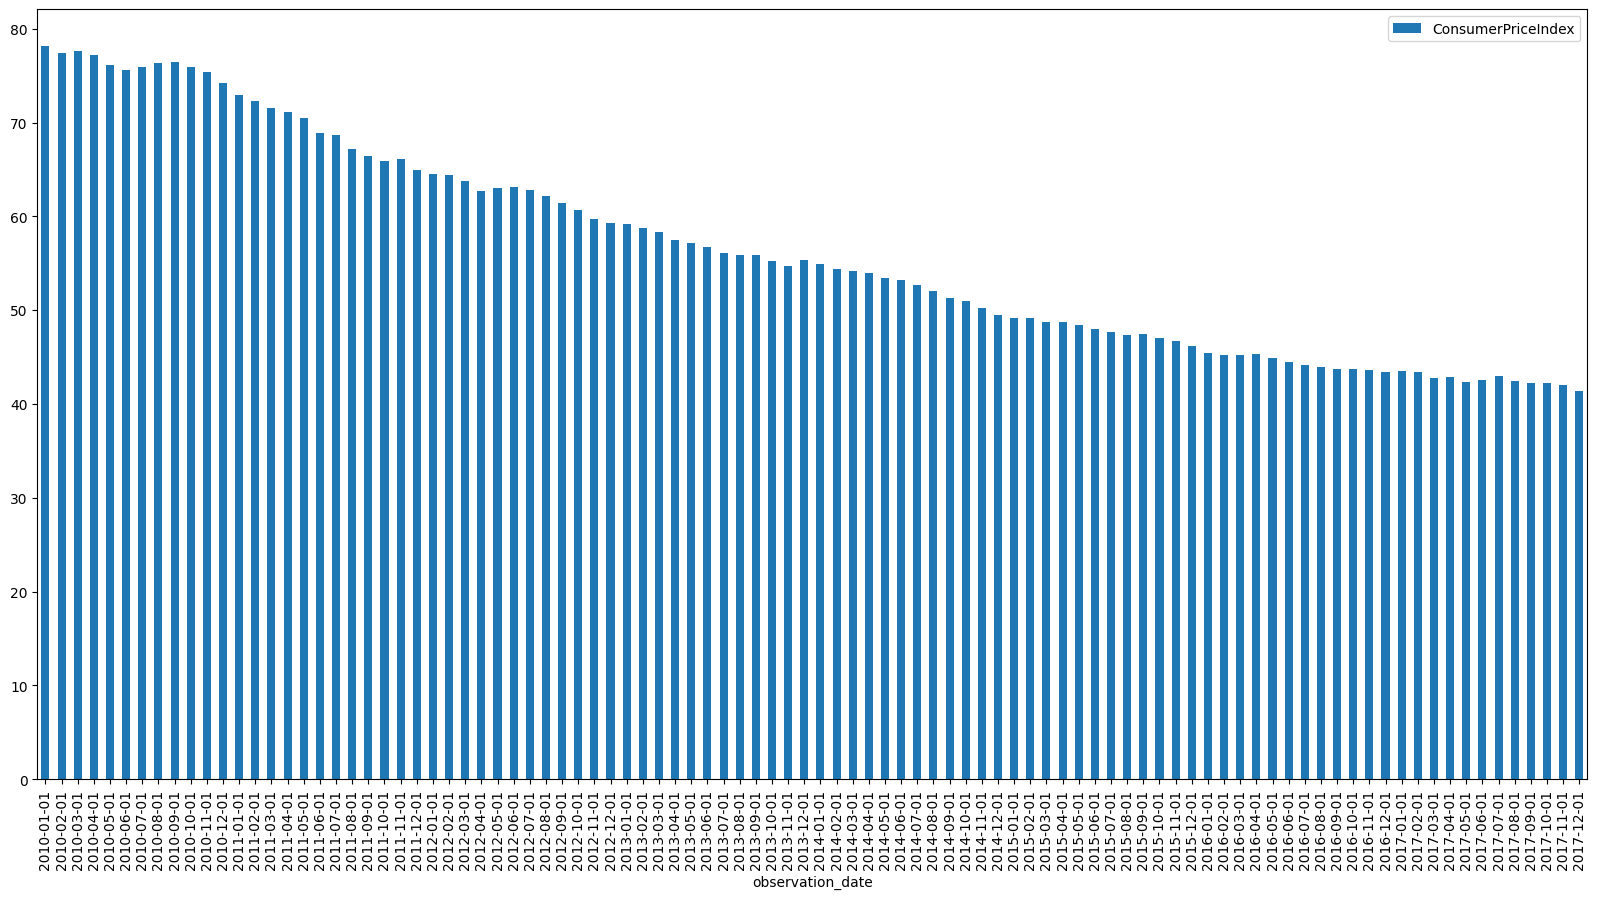

In [7]:
df_cpi_FirstHalf.plot.bar(x = "observation_date", y = "ConsumerPriceIndex", figsize = (20, 10))

<Axes: xlabel='observation_date'>

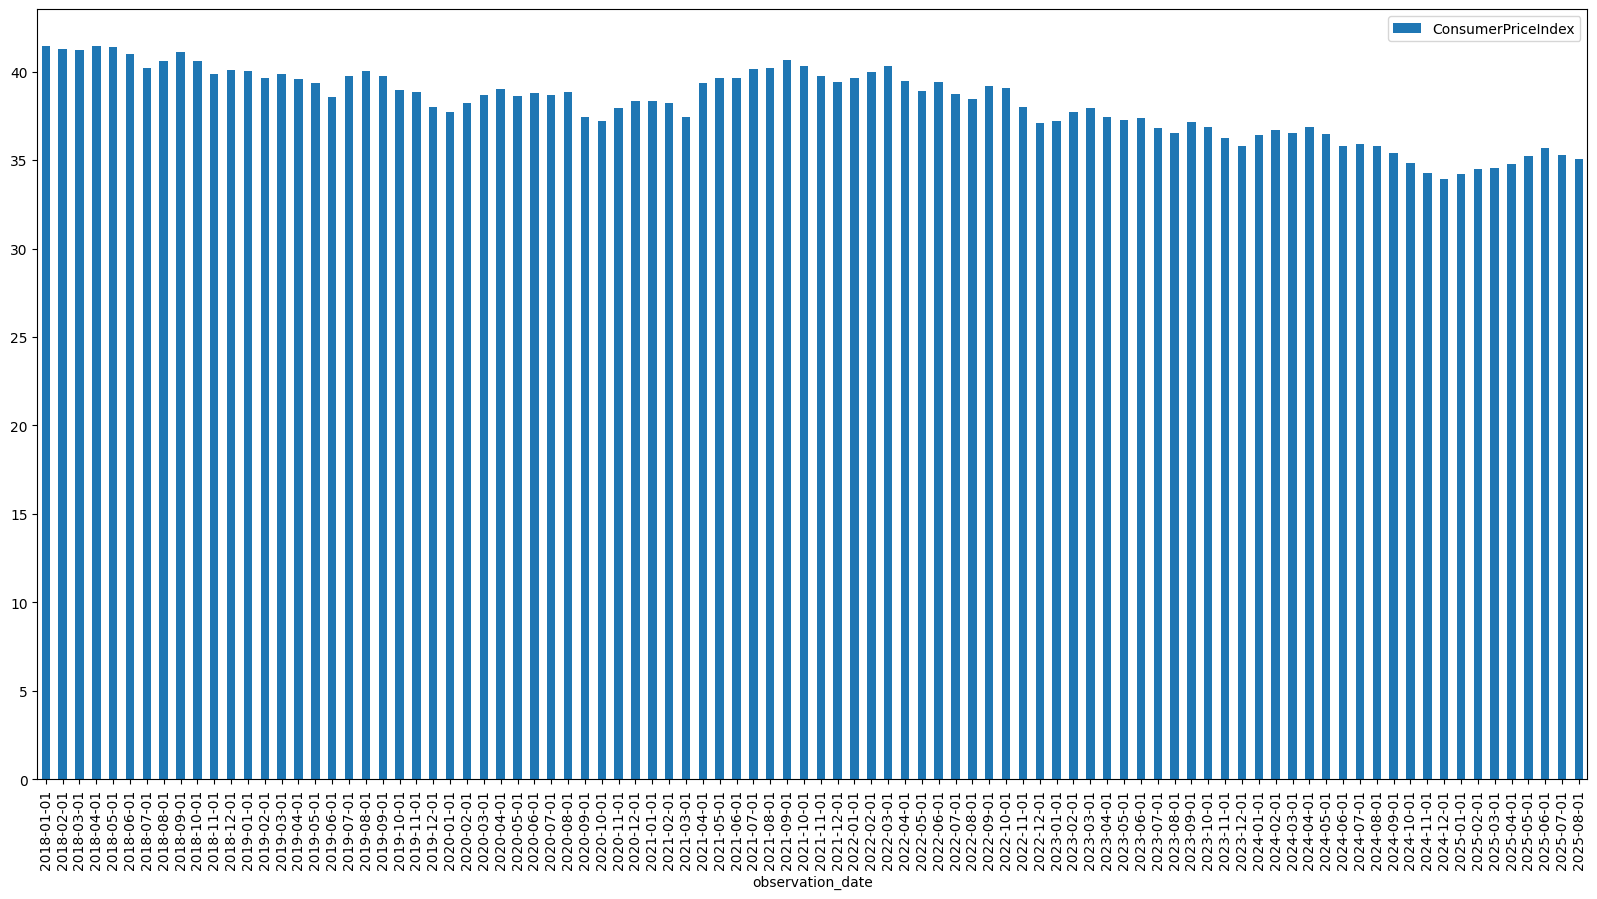

In [8]:
df_cpi_SecondHalf.plot.bar(x = "observation_date", y = "ConsumerPriceIndex", figsize = (20, 10))